# Domain: Startup Ecosystem

### Overview:

Company X, a prominent Indian digital publisher focused on providing deep insights into the startup landscape, is committed to equipping its readers with practical and valuable knowledge. In the fast-paced and ever-evolving world of startups, the company understands the importance of identifying key financial factors that distinguish successful, ongoing startups from those that have shut down.

### Objective:

This project aims to explore and determine whether there is a statistically significant difference in the average amount of funds raised by startups that are still in operation compared to those that have closed. Additionally, it seeks to examine whether a significant difference exists in the number of funding rounds between startups that continue to operate and those that have ceased operations.

*Note*:

*- Dataset Credits --> https://www.kaggle.com/datasets/yanmaksi/big-startup-secsees-fail-dataset-from-crunchbase

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [2]:
startup_df = pd.read_csv("D:/big_startup_secsees_dataset.csv")

In [3]:
startup_df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [4]:
filtered_df = startup_df[startup_df['country_code'] == 'IND']

In [5]:
filtered_df.tail()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
66240,/organization/zoutons,Zoutons,http://zoutons.com,E-Commerce|Online Shopping|Sales and Marketing,3300000,operating,IND,7,New Delhi,New Delhi,1,2013-01-01,2013-09-06,2013-09-06
66284,/organization/zumbl,Zumbl,http://zumbl.com,Chat|Entertainment|Interest Graph|Messaging,140000,operating,IND,10,New Delhi,Gurgaon,3,2012-11-01,2013-04-03,2014-04-05
66301,/organization/zupermeal,ZuperMeal,http://www.zupermeal.com,Food Processing,2000000,operating,IND,16,IND - Other,Andheri,1,NaN,2015-10-08,2015-10-08
66318,/organization/zuvvu,Zuvvu,http://zuvvu.com,Advertising|Social Media Advertising|Social Me...,12000,closed,IND,9,Ahmedabad,Ahmadabad,1,2010-06-01,2011-11-01,2011-11-01
66351,/organization/zynergy-projects-services,Zynergy Projects & Services,http://www.zynergygroup.net/,Clean Technology,-,operating,IND,25,Chennai,Chennai,1,NaN,2015-08-19,2015-08-19


In [6]:
filtered_df = startup_df[
    (startup_df['country_code'] == 'IND') & 
    (startup_df['status'].isin(['operating', 'closed']))
]

In [7]:
filtered_df

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
22,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,-,operating,IND,25,Chennai,Chennai,1,2008-01-01,2013-07-22,2013-07-22
135,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,6369507,operating,IND,10,New Delhi,Gurgaon,1,2012-06-01,2012-11-15,2012-11-15
151,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,4000000,operating,IND,19,Bangalore,Bangalore,1,2001-01-01,2007-11-06,2007-11-06
219,/organization/33coupons,33Coupons,http://33coupons.in,Internet,20000,operating,IND,36,Kanpur,Kanpur,1,2015-05-01,2015-07-06,2015-07-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66240,/organization/zoutons,Zoutons,http://zoutons.com,E-Commerce|Online Shopping|Sales and Marketing,3300000,operating,IND,7,New Delhi,New Delhi,1,2013-01-01,2013-09-06,2013-09-06
66284,/organization/zumbl,Zumbl,http://zumbl.com,Chat|Entertainment|Interest Graph|Messaging,140000,operating,IND,10,New Delhi,Gurgaon,3,2012-11-01,2013-04-03,2014-04-05
66301,/organization/zupermeal,ZuperMeal,http://www.zupermeal.com,Food Processing,2000000,operating,IND,16,IND - Other,Andheri,1,NaN,2015-10-08,2015-10-08
66318,/organization/zuvvu,Zuvvu,http://zuvvu.com,Advertising|Social Media Advertising|Social Me...,12000,closed,IND,9,Ahmedabad,Ahmadabad,1,2010-06-01,2011-11-01,2011-11-01


In [8]:
filtered_df.shape

(1536, 14)

In [9]:
filtered_df.drop_duplicates().shape

(1536, 14)

In [10]:
check = ['status','funding_total_usd','funding_rounds']
null_counts = filtered_df[check].isnull().sum()
print(null_counts)

status               0
funding_total_usd    0
funding_rounds       0
dtype: int64


In [11]:
filtered_df

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
22,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,-,operating,IND,25,Chennai,Chennai,1,2008-01-01,2013-07-22,2013-07-22
135,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,6369507,operating,IND,10,New Delhi,Gurgaon,1,2012-06-01,2012-11-15,2012-11-15
151,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,4000000,operating,IND,19,Bangalore,Bangalore,1,2001-01-01,2007-11-06,2007-11-06
219,/organization/33coupons,33Coupons,http://33coupons.in,Internet,20000,operating,IND,36,Kanpur,Kanpur,1,2015-05-01,2015-07-06,2015-07-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66240,/organization/zoutons,Zoutons,http://zoutons.com,E-Commerce|Online Shopping|Sales and Marketing,3300000,operating,IND,7,New Delhi,New Delhi,1,2013-01-01,2013-09-06,2013-09-06
66284,/organization/zumbl,Zumbl,http://zumbl.com,Chat|Entertainment|Interest Graph|Messaging,140000,operating,IND,10,New Delhi,Gurgaon,3,2012-11-01,2013-04-03,2014-04-05
66301,/organization/zupermeal,ZuperMeal,http://www.zupermeal.com,Food Processing,2000000,operating,IND,16,IND - Other,Andheri,1,NaN,2015-10-08,2015-10-08
66318,/organization/zuvvu,Zuvvu,http://zuvvu.com,Advertising|Social Media Advertising|Social Me...,12000,closed,IND,9,Ahmedabad,Ahmadabad,1,2010-06-01,2011-11-01,2011-11-01


In [12]:
status_counts = filtered_df['status'].value_counts()
print(status_counts)

status
operating    1467
closed         69
Name: count, dtype: int64


In [13]:
city_counts = filtered_df['city'].value_counts()

In [14]:
city_counts

city
Bangalore    372
Mumbai       282
New Delhi    170
Gurgaon      133
Hyderabad     84
            ... 
Khopoli        1
Jalna          1
Hubli          1
Bardoli        1
Belgaum        1
Name: count, Length: 91, dtype: int64

In [15]:
filtered_df['funding_total_usd'] = pd.to_numeric(filtered_df['funding_total_usd'], errors='coerce')

C:\Users\srija\AppData\Local\Temp\ipykernel_21608\1954329623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['funding_total_usd'] = pd.to_numeric(filtered_df['funding_total_usd'], errors='coerce')


In [126]:
filtered_df.loc[:, 'funding_total_usd'] = pd.to_numeric(filtered_df['funding_total_usd'], errors='coerce')


In [127]:
mean_funds_by_status = filtered_df.groupby('status')['funding_total_usd'].mean()

print(mean_funds_by_status)

status
closed       1.032291e+07
operating    2.398137e+07
Name: funding_total_usd, dtype: float64


In [128]:
formatted_mean_funds_by_status = mean_funds_by_status.map('${:,.2f}'.format)

print(formatted_mean_funds_by_status)

status
closed       $10,322,911.35
operating    $23,981,373.34
Name: funding_total_usd, dtype: object


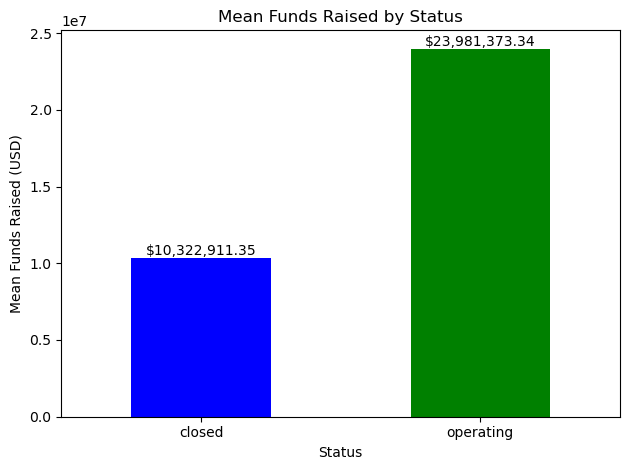

In [18]:

mean_funds_by_status.plot(kind='bar', color=['blue', 'green'])
plt.title('Mean Funds Raised by Status')
plt.xlabel('Status')
plt.ylabel('Mean Funds Raised (USD)')
plt.xticks(rotation=0)  


for i, value in enumerate(mean_funds_by_status):
    plt.text(i, value, '${:,.2f}'.format(value), ha='center', va='bottom')

plt.tight_layout()  
plt.show()

In [19]:
num_categories = filtered_df['category_list'].nunique()
print("Number of unique categories:", num_categories)

Number of unique categories: 806


In [20]:

top_categories = filtered_df['category_list'].value_counts().head(10).index.tolist()


df_top_categories = filtered_df[filtered_df['category_list'].isin(top_categories)]


startup_counts_by_category = df_top_categories['category_list'].value_counts()

print(startup_counts_by_category)

category_list
E-Commerce          71
Software            67
Education           45
Internet            28
Finance             27
Real Estate         25
Mobile              24
Clean Technology    22
Curated Web         22
Apps                20
Name: count, dtype: int64


In [21]:
median_funds_by_category = df_top_categories.groupby('category_list')['funding_total_usd'].median()

print(median_funds_by_category)

category_list
Apps                  500000.0
Clean Technology    15350000.0
Curated Web          5000000.0
E-Commerce           1200000.0
Education            1800000.0
Finance              8910000.0
Internet              650000.0
Mobile               4880000.0
Real Estate         11500000.0
Software             1500000.0
Name: funding_total_usd, dtype: float64


In [22]:
funding_round_counts = filtered_df['funding_rounds'].value_counts().sort_index()

In [23]:
funding_round_counts

funding_rounds
1     1158
2      239
3       93
4       27
5        9
6        5
7        2
8        1
11       1
12       1
Name: count, dtype: int64

In [24]:
filtered_df[filtered_df['funding_rounds']==11]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
52691,/organization/snapdeal,Snapdeal,http://www.snapdeal.com,E-Commerce,1.897700e+09,operating,IND,7,New Delhi,New Delhi,11,2010-01-01,2011-01-01,2015-08-18


In [25]:
filtered_df[filtered_df['funding_rounds']==12]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
20874,/organization/flipkart,Flipkart,http://www.flipkart.com,E-Commerce|Online Shopping,3.151140e+09,operating,IND,19,Bangalore,Bangalore,12,2007-09-01,2009-01-01,2015-07-28


In [26]:
filtered_df

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
22,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,NaN,operating,IND,25,Chennai,Chennai,1,2008-01-01,2013-07-22,2013-07-22
135,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,6369507.0,operating,IND,10,New Delhi,Gurgaon,1,2012-06-01,2012-11-15,2012-11-15
151,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,4000000.0,operating,IND,19,Bangalore,Bangalore,1,2001-01-01,2007-11-06,2007-11-06
219,/organization/33coupons,33Coupons,http://33coupons.in,Internet,20000.0,operating,IND,36,Kanpur,Kanpur,1,2015-05-01,2015-07-06,2015-07-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66240,/organization/zoutons,Zoutons,http://zoutons.com,E-Commerce|Online Shopping|Sales and Marketing,3300000.0,operating,IND,7,New Delhi,New Delhi,1,2013-01-01,2013-09-06,2013-09-06
66284,/organization/zumbl,Zumbl,http://zumbl.com,Chat|Entertainment|Interest Graph|Messaging,140000.0,operating,IND,10,New Delhi,Gurgaon,3,2012-11-01,2013-04-03,2014-04-05
66301,/organization/zupermeal,ZuperMeal,http://www.zupermeal.com,Food Processing,2000000.0,operating,IND,16,IND - Other,Andheri,1,NaN,2015-10-08,2015-10-08
66318,/organization/zuvvu,Zuvvu,http://zuvvu.com,Advertising|Social Media Advertising|Social Me...,12000.0,closed,IND,9,Ahmedabad,Ahmadabad,1,2010-06-01,2011-11-01,2011-11-01


In [29]:
filtered_df['funding_rounds'].value_counts().sort

funding_rounds
1     1158
2      239
3       93
4       27
5        9
6        5
7        2
12       1
11       1
8        1
Name: count, dtype: int64

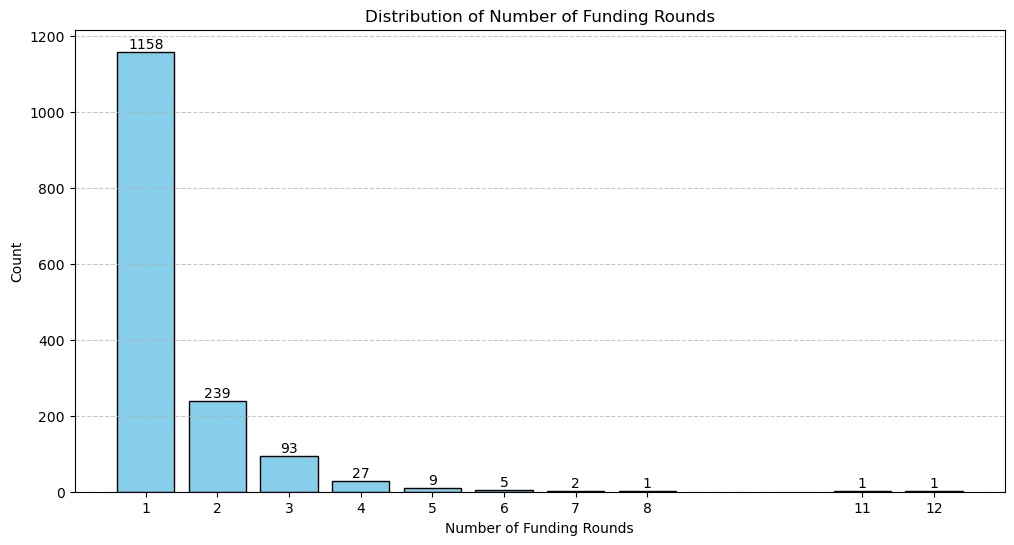

In [31]:
funding_round_counts = filtered_df['funding_rounds'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars= plt.bar(funding_round_counts.index, funding_round_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Count')
plt.title('Distribution of Number of Funding Rounds')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(funding_round_counts.index)
for bar, count in zip(bars, funding_round_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, count, ha='center')
plt.show()

In [41]:
df_cleaned = filtered_df.dropna(subset= ['funding_total_usd'])

In [42]:
df_cleaned['funding_rounds'].value_counts()

funding_rounds
1     795
2     205
3      88
4      27
5       9
6       5
7       2
12      1
11      1
8       1
Name: count, dtype: int64

In [44]:
filtered_df_1 = df_cleaned

In [131]:
filtered_df_1['funding_total_usd'].describe().map('${:,.2f}'.format)

count            $1,134.00
mean        $23,391,192.89
std        $153,640,841.53
min                $569.00
25%            $200,000.00
50%          $1,275,000.00
75%         $10,000,000.00
max      $3,151,140,000.00
Name: funding_total_usd, dtype: object

In [139]:
min_value = filtered_df_1['funding_total_usd'].min()
max_value = filtered_df_1['funding_total_usd'].max()
mi = filtered_df_1[filtered_df_1['funding_total_usd'] == min_value]
mx = filtered_df_1[filtered_df_1['funding_total_usd'] == max_value]



# Display specific columns for the startup with minimum funding
min_funding_info = mi[['name', 'funding_rounds', 'city']]
print("Startup with Minimum Funding:", min_value)
print(min_funding_info)

# Display specific columns for the startup with maximum funding
max_funding_info = mx[['name', 'funding_rounds', 'city']]
print("\nStartup with Maximum Funding:", max_value)
print(max_funding_info)


Startup with Minimum Funding: 569.0
              name  funding_rounds   city
49091  RuralServer               1  Noida

Startup with Maximum Funding: 3151140000.0
           name  funding_rounds       city
20874  Flipkart              12  Bangalore


#### Step 3: Selecting the Appropriate Statistical Test

### Mean Funds Raised

Null Hypothesis (H0): There is no statistically significant difference in the mean funds raised by currently operating startups and startups that have closed.

Alternative Hypothesis (H1): There is a statistically significant difference in the mean funds raised by currently operating startups and startups that have closed.

Using an independent sample t-test in this context is justified for the following reasons:
1. Comparing Two Independent Groups: The independent sample t-test is suitable when we are comparing two separate and independent groups, which aligns perfectly with our scenario of comparing currently operating startups with startups that have closed. These two groups are distinct and unrelated in terms of their current status.

2. Continuous Numeric Data: The t-test is designed for comparing means of continuous numerical data, which is precisely what we have in our hypothesis testing. We are interested in comparing the mean funds raised, a continuous variable, between the two groups.

3. Normal Distribution Assumption: The t-test assumes that the data within each group follows a normal distribution. While this assumption should be checked, it often holds reasonably well for financial data, especially when the sample size is sufficiently large ~ we know basis EDA that both have >30 sample size

4. Homogeneity of Variance: We must check that using Levene Test.

The Levene's Test is a statistical test used to assess whether the variances of two or more groups are equal or homogenous.

**Null Hypothesis (H0):** The null hypothesis in Levene's Test is that there are no significant differences in the variances of the groups being compared. In other words, it assumes that the variances are equal across all groups.

**Alternative Hypothesis (H1):** The alternative hypothesis in Levene's Test is that there are significant differences in the variances of the groups being compared. If the p-value is sufficiently small, you would reject the null hypothesis in favor of the alternative, indicating that at least one group has a significantly different variance compared to the others.

In [45]:
from scipy import stats

gr_1 = filtered_df_1[filtered_df_1['status']== 'operating']['funding_total_usd']
gr_2 = filtered_df_1[filtered_df_1['status']== 'closed']['funding_total_usd']

stat, p_value = stats.levene(gr_1, gr_2)
print(f"Levene's Test Statistic: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Variance are not equal.")
else:
    print("Fail to reject the null hypothese: Vairances are equal.")


Levene's Test Statistic: 0.36074537025282777
P-value: 0.5482127964683872
Fail to reject the null hypothese: Vairances are equal.


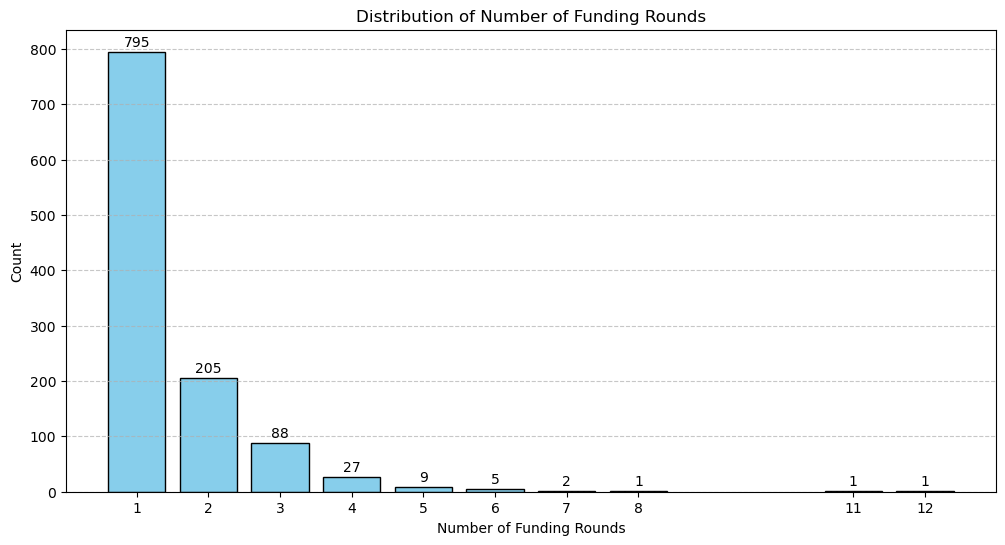

In [47]:
funding_round_counts = filtered_df_1['funding_rounds'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars= plt.bar(funding_round_counts.index, funding_round_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Count')
plt.title('Distribution of Number of Funding Rounds')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(funding_round_counts.index)
for bar, count in zip(bars, funding_round_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, count, ha='center')
plt.show()

In [49]:
filtered_df_1[filtered_df_1['status']=='operating']['funding_total_usd'].count()

1085

In [50]:
filtered_df_1[filtered_df_1['status']=='closed']['funding_total_usd'].count()

49

In [70]:
df1 = filtered_df_1.loc[startup_df['status'] == 'operating', ['funding_total_usd']].rename(columns={'funding_total_usd':'Funds_Sample1'}).reset_index(drop=True)

In [71]:
df1.head()

,Funds_Sample1
0,10000000.0
1,6369507.0
2,4000000.0
3,20000.0
4,2065000.0


In [61]:
df2 = filtered_df_1.loc[startup_df['status'] == 'closed', ['funding_total_usd']].rename(columns={'funding_total_usd':'Funds_Sample2'}).reset_index(drop=True)

In [68]:
df2.head()


,Funds_Sample2
0,25000.0
1,10000.0
2,10000000.0
3,40000.0
4,25000000.0


In [75]:
df3 = pd.concat([df1, df2], axis = 1)
df3.head()

,Funds_Sample1,Funds_Sample2
0,10000000.0,25000.0
1,6369507.0,10000.0
2,4000000.0,10000000.0
3,20000.0,40000.0
4,2065000.0,25000000.0


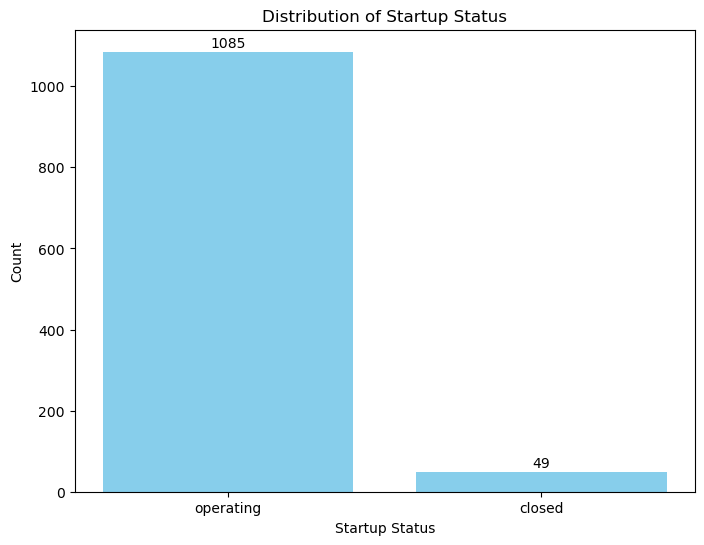

In [74]:
# Visualize 'Status' column

status_counts = filtered_df_1['status'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(status_counts.index, status_counts.values, color='skyblue')
plt.xlabel('Startup Status')
plt.ylabel('Count')
plt.title('Distribution of Startup Status')

# Adding data labels (count values) to the bars
for i, v in enumerate(status_counts):
    plt.text(i, v + 10, v, ha='center')
    # i: This is the x-coordinate where the data label will be placed.
    # v + 10: This is the y-coordinate where the data label will be placed
    # ha='center': This parameter specifies the horizontal alignment of the text, ensuring that it's centered above each bar.

# Display the plot
plt.show()

In [76]:
mean_1=df3['Funds_Sample1'].mean()

print('Mean funds (in million) for startup which are operating is:',mean_1)

Mean funds (in million) for startup which are operating is: 23981373.343251728


In [77]:
mean_2=df3['Funds_Sample2'].mean()

print('Mean funds (in million) for startup which are closed is:',mean_2)

Mean funds (in million) for startup which are closed is: 10322911.346938776


Null Hypothesis
H0: There is *no*  significant difference between mean funds raised by the two groups of startups that are closed and operating

i.e H0: mean_1 = mean_2

Alternative hypothesis

H1: There *is*  significant difference between mean funds raised by the two groups of startups that are closed and operating

i.e H1: mean_1 != mean_2

Our Alpha Value is = 0.05

In [79]:
from scipy.stats import ttest_ind

In [80]:
t, pvalue = ttest_ind(df3['Funds_Sample1'], df3['Funds_Sample2'], nan_policy = 'omit')
print('T-statistic',t)
print('P-value:', pvalue)

T-statistic 0.6085283061630911
P-value: 0.5429592211146083


#### The p-value, is greater than the chosen alpha level (i.e, 0.54 > 0.05), which makes us reject the null hypothesis with 95% confidence. Therefore, we can conclude that there is no significant difference between mean funds raised by currently operating and closed startups

## Number of Funding Rounds

We use the Chi-Square Test of Independence 

In our case, as we are interested in the number of funding rounds (which is likely a discrete, count variable) and the status of startups (which is categorical - either "currently operating" or "closed"). 

The chi-square Test of Independence is suitable for our hypothesis as, 

We know that observations are independent, and Cells in the contingency table are mutually exclusive, The only thing we need to check is if ~ Expected value of cells should be 5 or greater in at least 80% of cells.

C:\Users\srija\AppData\Local\Temp\ipykernel_21608\664548112.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_1['rounds of funding category'] = filtered_df_1['funding_rounds'].apply(categorize_rounds)


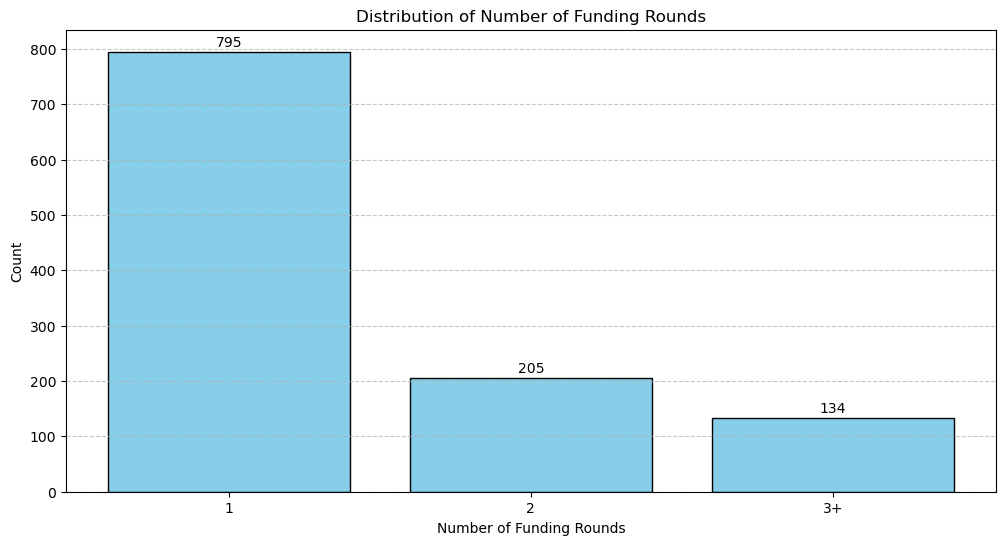

In [102]:
def categorize_rounds(round):
    if round == 1:
        return '1'
    elif round == 2:
        return '2'
    else:
        return '3+'

filtered_df_1['rounds of funding category'] = filtered_df_1['funding_rounds'].apply(categorize_rounds)
rg1 = filtered_df_1['rounds of funding category'].value_counts()
plt.figure(figsize=(12, 6))
bars= plt.bar(rg1.index, rg1.values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Count')
plt.title('Distribution of Number of Funding Rounds')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rg1.index)
for bar, count in zip(bars, rg1):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, count, ha='center')
plt.show()


In [103]:
both = pd.crosstab(filtered_df_1['rounds of funding category'], filtered_df_1['status'])

In [125]:
contingency_table = pd.crosstab(filtered_df_1['rounds of funding category'], filtered_df_1['status'])

# Calculate expected frequencies
expected_frequencies = stats.contingency.expected_freq(contingency_table)

# Create a DataFrame to display the expected frequencies
expected_df = pd.DataFrame(expected_frequencies, columns=contingency_table.columns, index=contingency_table.index)

# Display the expected frequencies
print("Expected Frequencies:")
print(expected_df)

Expected Frequencies:
status                         closed   operating
rounds of funding category                       
1                           34.351852  760.648148
2                            8.858025  196.141975
3+                           5.790123  128.209877


As all the expected frequencies are above the threshold of 5, that means our dataset meets the requirement for expected frequency assumption in the chi square test for independence. So we can proceed with our hypothesis testing

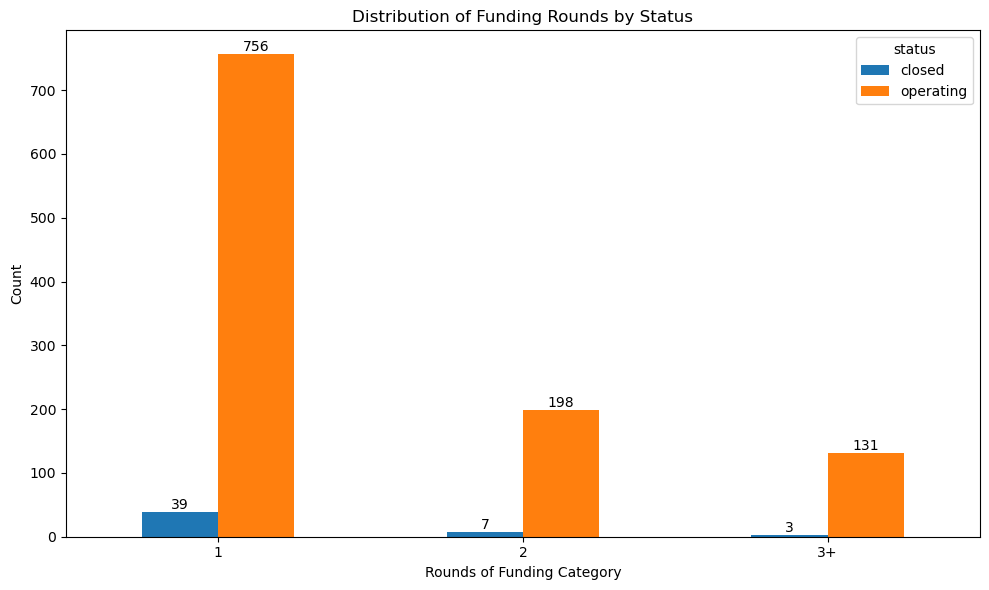

In [124]:
ax = contingency_table.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Rounds of Funding Category')
plt.ylabel('Count')
plt.title('Distribution of Funding Rounds by Status')
plt.xticks(rotation=0)  

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.tight_layout()  
plt.show()

In [94]:
from scipy.stats import chi2_contingency

# Run the Chi Square Test

chi2, pval, dof, exp_freq = chi2_contingency(contingency_table, correction = False)
print('The p-value is',pval)

The p-value is 0.2908506204110049


As the P-value is of 0.29>  0.05 as a result we fail to reject the null hypothesis. This suggests that there is no statistically significant difference in the number of funding rounds between currently operating startups and startups that have closed their operations based on our chosen level of significance 

## So we can conclude by saying, 
### there is no statistically significant difference in the funds raised by currently operating startups and startups that have closed, as per the independent sample t-test. 
### There is no statistically significant association between the number of funding rounds and the status of startups, as indicated by the Chi-Square Test of Independence.